**Recreating the results of the thyroid classification dataset and attaing .99 F1 scores using similar parameters**    
Followed by various sampling methods to expand the dataset while retaining F1 scores of newly trained model on the original, real dataset    



In [2]:
import pandas as pd 
df = pd.read_csv('/Users/doctorflu/Desktop/disease_pred/datasets/thyroidDF.csv')
print (df.head())


   age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   

  T4U FTI_measured FTI TBG_measured   TBG  r

In [3]:
count = df['target'].value_counts()
df1 = count[count > 230].index #choosing target classes with over 230 samples (5 classes)
print (f'The selected target classes for initial analysis are {df1}')
print (f'The counts of all target classes is \n{count}')

The selected target classes for initial analysis are Index(['-', 'K', 'G', 'I', 'F'], dtype='object')
The counts of all target classes is 
-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64


In [4]:
target_labels = {
    '-'  : 'Normal',
    'K' :  'concurrent non-thyroidal illness',
    'G' : 'compensated hypothyroid',
    'I'  : 'increased binding protein',
    'F'  : 'primary hypothyroid'
}

df_t = df[df['target'].isin(df1)] #dataframe containing only target label classes
df_t = df_t[df_t['target'] != '-'] #removing all normal samples


In [5]:
indices = df[df['target'] == '-'].index
rand_select = pd.Series(indices).sample(n=400, random_state=1) #randomly selecting 400 normal patients data points and saving them

In [6]:
df1 = df.loc[rand_select]
df_f = pd.concat([df1, df_t], axis= 0) #recreated training dataset
count = df_f['target'].value_counts()
print (f'The data count of target labels are \n{count}')

The data count of target labels are 
K    436
-    400
G    359
I    346
F    233
Name: target, dtype: int64


In [7]:
print (df_f.tail()) #dataset used in research paper 

      age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
9149   75   F            t                  f                   f    f   
9153   64   M            f                  f                   f    f   
9157   60   M            f                  f                   t    f   
9162   36   F            f                  f                   f    f   
9169   69   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
9149        f               f              f                 t  ...   54.0   
9153        f               f              f                 f  ...   31.0   
9157        f               f              f                 f  ...   28.0   
9162        f               f              f                 f  ...   84.0   
9169        f               f              f                 f  ...  113.0   

     T4U_measured   T4U FTI_measured   FTI TBG_measured TBG  referral_source  \
9149  

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier


X = df_f.drop('target', axis= 1) #initialising training and testing data
y = df_f['target']
print (X.shape, df_f.shape, y.shape)

(1774, 30) (1774, 31) (1774,)


In [9]:
#One hot encoding all the binary data
cols_encode = ['sex','on_thyroxine','query_on_thyroxine',	'on_antithyroid_meds'	,'sick','pregnant',	'thyroid_surgery',	'I131_treatment',	'query_hypothyroid','query_hyperthyroid','lithium',	'goitre','tumor',	'hypopituitary',	'psych','TSH_measured','T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source']
X = pd.get_dummies(X, columns= cols_encode)
print (X.shape) #one hot encoded binary responses in input data

(1774, 56)


In [10]:
X.fillna(-1, inplace= True) #fill empty cells with -1 value for model to ignore
X.tail()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id,sex_F,sex_M,...,FTI_measured_f,FTI_measured_t,TBG_measured_f,TBG_measured_t,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
9149,75,18.00,-1.0,54.0,1.03,53.0,-1.0,870116038,1,0,...,0,1,1,0,0,0,0,1,0,0
9153,64,0.81,-1.0,31.0,0.55,56.0,-1.0,870116043,0,1,...,0,1,1,0,0,0,0,1,0,0
9157,60,0.18,-1.0,28.0,0.87,32.0,-1.0,870116053,0,1,...,0,1,1,0,0,0,0,0,0,1
9162,36,-1.00,-1.0,84.0,1.26,67.0,-1.0,870119008,1,0,...,0,1,1,0,0,0,0,0,0,1
9169,69,-1.00,-1.0,113.0,1.27,89.0,-1.0,870119025,0,1,...,0,1,1,0,0,0,0,1,0,0


In [11]:
#Using original features to train intital model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
model1 = RandomForestClassifier(n_estimators= 200, max_depth= 20)
model1.fit(X_train, y_train) #training the model using original feature set


RandomForestClassifier(max_depth=20, n_estimators=200)

In [12]:
y_pred = model1.predict(X_test)
s1 = model1.score(X_test, y_test) #evaluating model performance
print (f'RFC with original features performs with an accuracy of {s1} ')

RFC with original features performs with an accuracy of 0.9774647887323944 


In [13]:
#using Machine learning feature selection 
etc = ExtraTreesClassifier(n_estimators=200, max_depth= 20, random_state= 1)
etc.fit(X,y)#calculating feature importance scores
sfm = SelectFromModel(etc, threshold= 0.015)
sfm.fit(X, y) #fitting threshold values of feature importance
X_mlfs = sfm.transform(X)

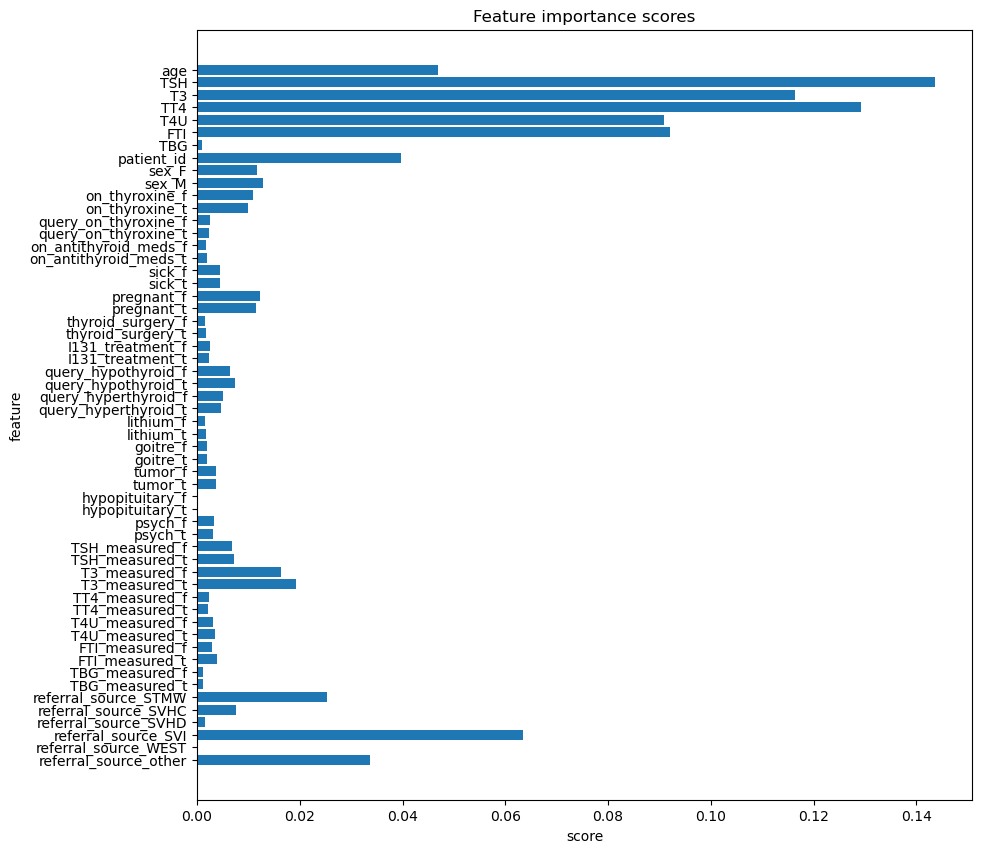

In [14]:
#Feature importance graph
import matplotlib.pyplot as plt
feature_names = X.columns
feat_imp = etc.feature_importances_
plt.figure(figsize= (10, 10))
plt.barh(feature_names, feat_imp)
plt.title('Feature importance scores')
plt.ylabel('feature')
plt.xlabel('score')
plt.gca().invert_yaxis()
plt.show()


In [15]:
etc1 = SelectFromModel(RandomForestClassifier(n_estimators=200, max_depth=20, random_state=1), threshold=0.015) #running feature importance calculations
X_select = etc1.fit_transform(X, y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_select, y, test_size= 0.2, random_state= 0)

# training model on selected features 
mod_v1 = RandomForestClassifier(n_estimators=200, max_depth=20) #model with selected MLFS features
mod_v1.fit(X_train1, y_train1)
mod_v1.score(X_test1, y_test1)


0.9830985915492958

In [33]:
#Using 10 fold CV
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle= True, random_state=1) #setting parameters for cros validation
score = cross_val_score(mod_v1, X_select, y, cv= kf, scoring= 'accuracy')#setting scoring criteria

for fold, score in enumerate(score):
    print(f'Fold {fold+1} - Accuracy {score:.4f}')
    
std_v1 = score.std() #problem
print (f'Standard deviaition of model is {std_v1:.4f}')
mean_v1 = score.mean()
print (f'Mean of cross validation results is {mean_v1:.4f}')


Fold 1 - Accuracy 0.9663
Fold 2 - Accuracy 0.9888
Fold 3 - Accuracy 0.9831
Fold 4 - Accuracy 0.9944
Fold 5 - Accuracy 0.9718
Fold 6 - Accuracy 0.9718
Fold 7 - Accuracy 0.9774
Fold 8 - Accuracy 0.9718
Fold 9 - Accuracy 0.9831
Fold 10 - Accuracy 0.9718
Standard deviaition of model is 0.0000
Mean of cross validation results is 0.9718
